<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
penguim = sns.load_dataset('penguins')

In [ ]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

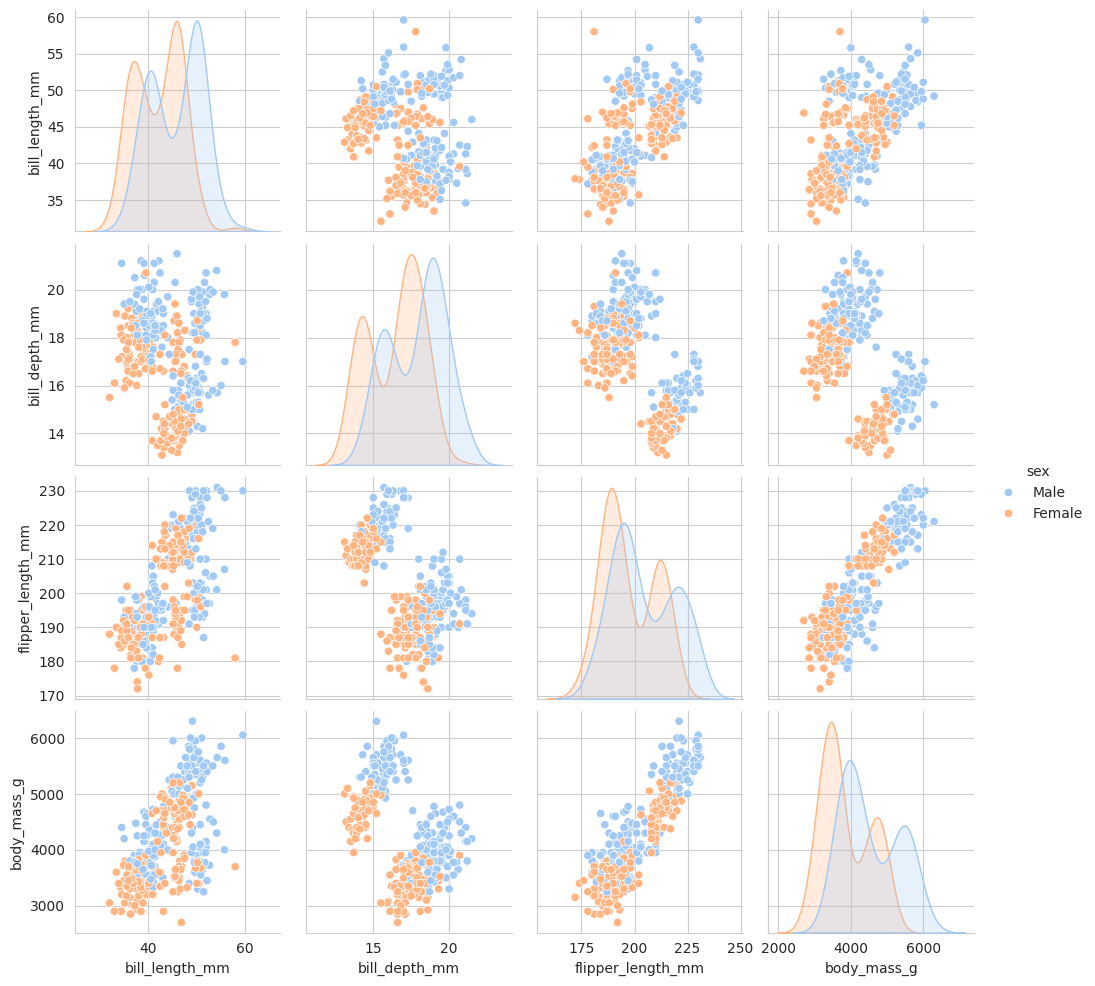

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** ?

Os machos tendem a ser mais pesados, adenpender do atribudo obersado a o peso varia de forma semelhante entre os machos e femeas, mas sempre os machos tem um percentual maior de peso quando comparado com femeas com atributos semelhantes

 - Atributos por espécie:

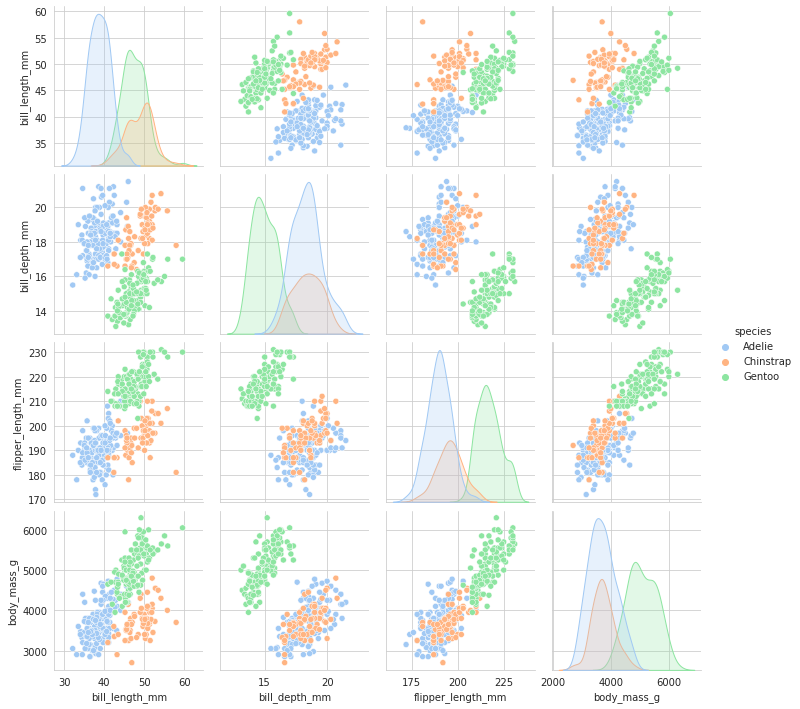

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** ?

Os da especie Gento são os mais pesados e também os que tem maior nadadeiras, o que pode sugerir uma correlação.

 - Atributos por ilha:

1.   Item da lista
2.   Item da lista



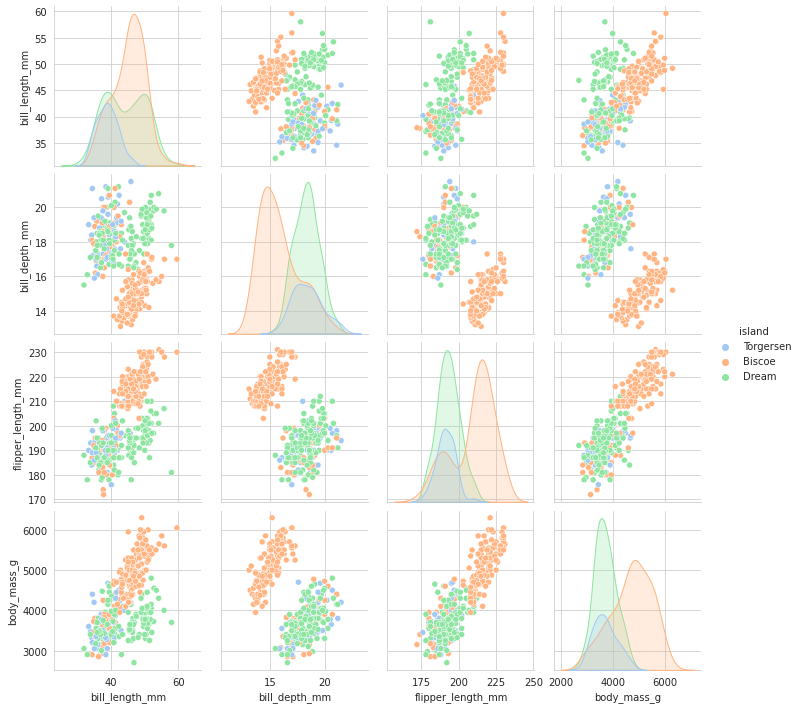

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** ?

Os da ilha Biscoe são os que tendem a ter as maiores nadadeiras e são também os que tendem a ser os mais pesados, talves essa seja a ilha lar dos Gentos

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1

print(penguim.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
data = penguim.dropna()

In [ ]:
gento = penguim[penguim["species"] == "Gentoo"]

In [ ]:
gento.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male


### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2

col_faltantes = penguim.columns[penguim.isnull().any()]
col_faltantes = col_faltantes.drop("body_mass_g")

for col in col_faltantes[:-1]:
  data[f"{col}_std"] = data[col].apply(lambda v: (v - data[col].mean()) / (data[col].std()) )

<ipython-input-155-5dab265fbf57>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{col}_std"] = data[col].apply(lambda v: (v - data[col].mean()) / (data[col].std()) )
<ipython-input-155-5dab265fbf57>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{col}_std"] = data[col].apply(lambda v: (v - data[col].mean()) / (data[col].std()) )
<ipython-input-155-5dab265fbf57>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
print(col_faltantes)

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex'], dtype='object')


In [ ]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474


### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.3

dt_species = list(set(data['species']))
dt_island = list(set(data['island']))

for esp in dt_species:
  data[f"eps_{esp}_nom"] = data['species'].apply(lambda e: 1 if e == esp else 0)

for isl in dt_island:
  data[f"isl_{isl}_nom"] = data['island'].apply(lambda i: 1 if i == isl else 0)

<ipython-input-156-a9a6c7b1d16c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"eps_{esp}_nom"] = data['species'].apply(lambda e: 1 if e == esp else 0)
<ipython-input-156-a9a6c7b1d16c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"eps_{esp}_nom"] = data['species'].apply(lambda e: 1 if e == esp else 0)
<ipython-input-156-a9a6c7b1d16c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
data['eps_Gentoo_nom'] = data['eps_Gentoo_nom'].apply(lambda v: 10 if v == 3 else v)

In [ ]:
data["sex_male"] = data["sex"].apply(lambda s: 2 if s == "Male" else 0)
data["sex_female"] = data["sex"].apply(lambda s: 1 if s == "Female" else 0)

KeyError: 'sex'

### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [ ]:
data.iloc[220]

eps_Gentoo_nom             10.000000
eps_Adelie_nom              0.000000
eps_Chinstrap_nom           0.000000
isl_Dream_nom               0.000000
isl_Torgersen_nom           0.000000
isl_Biscoe_nom              1.000000
bill_length_mm_std          0.257322
bill_depth_mm_std          -1.302467
flipper_length_mm_std       0.715839
body_mass_g              4800.000000
sex_male                    0.000000
sex_female                  1.000000
Name: 226, dtype: float64

In [ ]:
# resposta da questão 2.4

data = data[["eps_Gentoo_nom", "eps_Adelie_nom", "eps_Chinstrap_nom", "isl_Dream_nom", "isl_Torgersen_nom", "isl_Biscoe_nom", "bill_length_mm_std", "bill_depth_mm_std", "flipper_length_mm_std", "body_mass_g", "sex_male", "sex_female" ]]

In [ ]:
data.head()


,eps_Gentoo_nom,eps_Adelie_nom,eps_Chinstrap_nom,isl_Dream_nom,isl_Torgersen_nom,isl_Biscoe_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_male,sex_female
0,0,1,0,0,1,0,-0.894695,0.779559,-1.424608,-0.567621,1,0
1,0,1,0,0,1,0,-0.821552,0.119404,-1.067867,-0.505525,0,1
2,0,1,0,0,1,0,-0.675264,0.424091,-0.425733,-1.188572,0,1
4,0,1,0,0,1,0,-1.333559,1.084246,-0.568429,-0.940192,0,1
5,0,1,0,0,1,0,-0.858123,1.744400,-0.782474,-0.691811,1,0


### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(["body_mass_g"], axis=1),
    data['body_mass_g'],
    test_size=0.25,
    random_state = 123

)

In [ ]:
predictors_train.shape

(249, 11)

In [ ]:
predictors_test.shape

(84, 11)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [ ]:
# resposta da questão 3.1

from sklearn.linear_model import LinearRegression


model = LinearRegression()

model = model.fit(predictors_train, target_train)


model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['eps_Gentoo_nom', 'eps_Adelie_nom', 'eps_Chinstrap_nom',
        'isl_Dream_nom', 'isl_Torgersen_nom', 'isl_Biscoe_nom',
        'bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'sex_male', 'sex_female'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 111.30836925,  164.29868109, -175.42951802,   47.43754479,
         -67.62760481,   20.19006002,  128.95017535,  159.25487577,
         248.88232459,  134.05038207,  -67.02519104]),
 'rank_': 8,
 'singular_': array([8.01601482e+01, 2.04633540e+01, 1.37313001e+01, 6.82467398e+00,
        6.16609677e+00, 5.72084893e+00, 5.32336954e+00, 3.41596469e+00,
        3.44534708e-15, 2.06357243e-15, 1.53975253e-15]),
 'intercept_': 3642.9110067913393}

### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [ ]:
# resposta da questão 3.2

from sklearn.metrics import mean_squared_error

target_predicted = model.predict(predictors_test)

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))

print(rmse)

306.3733964340448


In [ ]:
print((rmse/penguim['body_mass_g'].mean()))

0.07291558913044073


## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

In [ ]:
data.head(1)

,eps_Gentoo_nom,eps_Adelie_nom,eps_Chinstrap_nom,isl_Dream_nom,isl_Torgersen_nom,isl_Biscoe_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g,sex_male,sex_female
0,0,1,0,0,1,0,-0.894695,0.779559,-1.424608,3750.0,2,0


In [ ]:
length_std = ((38.2 - penguim['bill_length_mm'].mean()) / penguim['bill_length_mm'].std())
depth_std =  ((18.1 - penguim['bill_depth_mm'].mean()) / penguim['bill_depth_mm'].std())
flipper_std = ((185 - penguim['flipper_length_mm'].mean()) / penguim['flipper_length_mm'].std())

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [ ]:
pinguim = np.array([0,	1, 0,	0, 0, 1, length_std, depth_std, flipper_std, 1, 0])

In [ ]:
# resposta da questão 4.1

peso = model.predict(pinguim.reshape(1,-1))

print(peso)

[3621.13310727]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---